**Stationarity**

1. Trend is zero.

2. Variance and Mean is constant.

3. Autocorrelation is constant.

In [49]:
# import packages and libraries
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

In [50]:
#Import dataset and set date to index
candy = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/candy_production.csv', parse_dates=['date'], index_col='date')
candy.head()

,IPG3113N
date,
1972-01-01,85.598809
1972-02-01,71.741404
1972-03-01,65.948809
1972-04-01,64.490724
1972-05-01,64.933842


In [51]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 564 entries, 1972-01-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   IPG3113N  564 non-null    float64
dtypes: float64(1)
memory usage: 8.8 KB


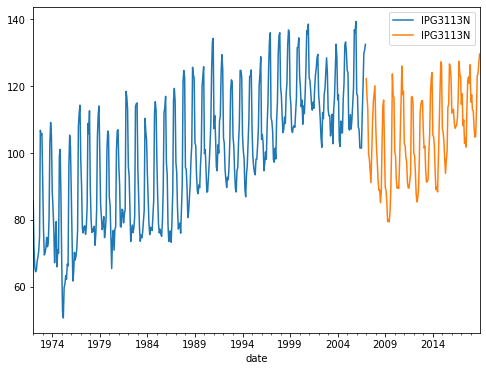

In [52]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006',]
candy_test = candy.loc['2007':,]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax, figsize=(8, 6))
candy_test.plot(ax=ax, figsize=(8, 6))
plt.show();

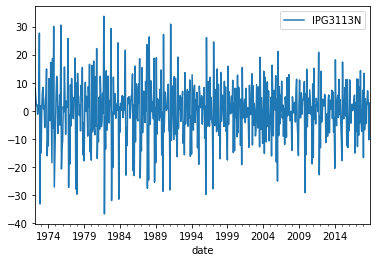

In [123]:
candy.diff().diff().dropna().plot()
plt.show();

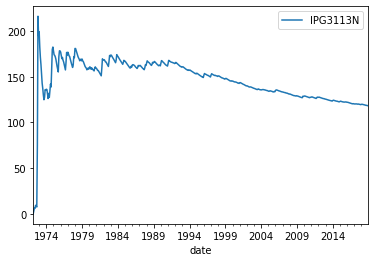

In [124]:
candy.diff().diff().dropna().expanding(min_periods=1).var(ddof=0).plot()
plt.show();

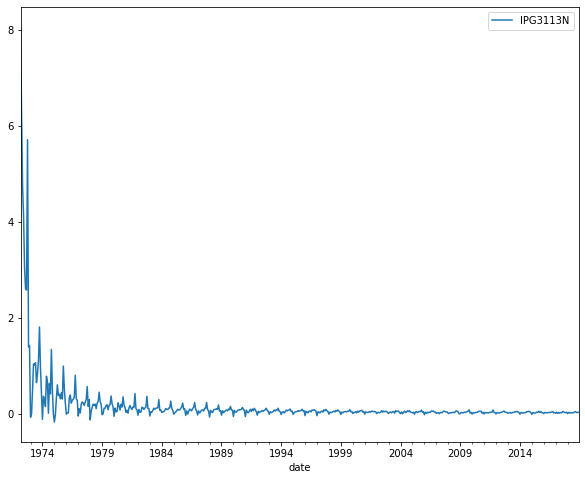

In [125]:
candy.diff().diff().dropna().expanding(min_periods=1).mean().plot(figsize=(10, 8))
plt.show();

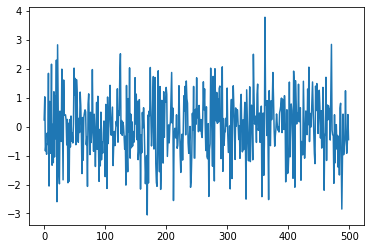

In [56]:
seed(25)

# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

plt.plot(steps)
plt.show();

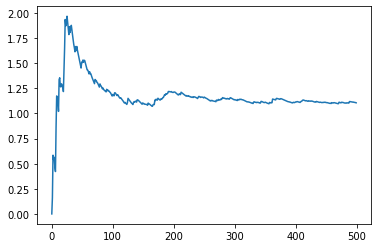

In [57]:
pd.Series(steps).expanding(min_periods=1).var(ddof=0).plot()
plt.show();

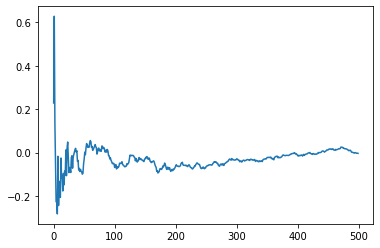

In [58]:
pd.Series(steps).expanding(min_periods=1).mean().plot()
plt.show();

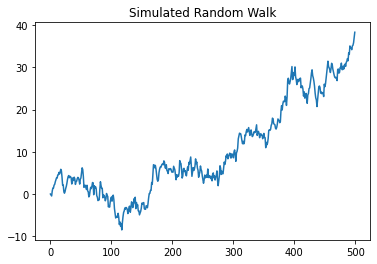

In [59]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

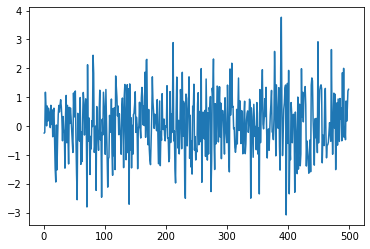

In [60]:
pd.Series(P).diff().dropna().plot()
plt.show();

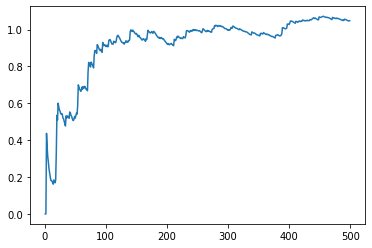

In [61]:
pd.Series(P).diff().dropna().expanding(min_periods=1).var(ddof=0).plot()
plt.show();

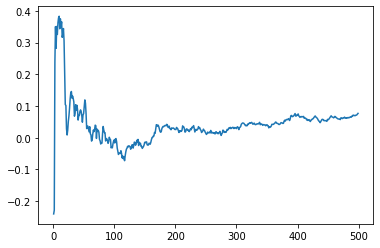

In [62]:
pd.Series(P).diff().dropna().expanding(min_periods=1).mean().plot()
plt.show();

In [63]:
#Import amazon dataset
amazon = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/amazon_close.csv', parse_dates=['date'], index_col='date').sort_values(by='date', ascending=True)
amazon.head()

,close
date,
2014-02-10,360.87
2014-02-11,361.79
2014-02-12,349.25
2014-02-13,357.20
2014-02-14,357.35


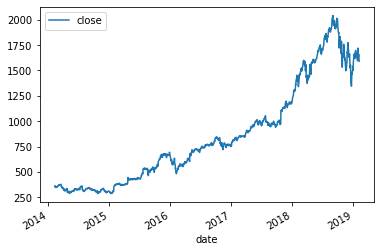

In [64]:
amazon.plot()
plt.show();

In [65]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

test_res = adfuller(amazon)

print(test_res)
print('Random_walk:', test_res[1] > 0.05)

(-0.10724784613127215, 0.9487118177265275, 23, 1235, {'1%': -3.4356560275160835, '5%': -2.8638831211270817, '10%': -2.568017509711682}, 10873.2983089527)
Random_walk: True


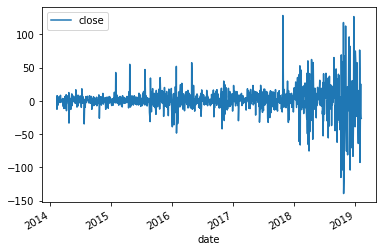

In [66]:
# Develop the model
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Take the first difference of the data
amazon_diff = amazon.diff().dropna()

amazon_diff.plot()
plt.show();

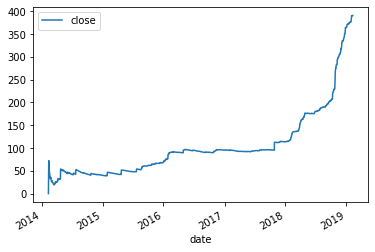

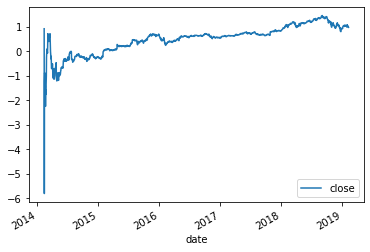

In [67]:
# Check variance and mean of the return.
amazon.diff().dropna().expanding(min_periods=1).var(ddof=0).plot()
plt.show();

amazon.diff().dropna().expanding(min_periods=1).mean().plot()
plt.show();

The difference obtain shows mostly stationarity.

In [68]:
# Create ARMA(3,3) model
result = ARIMA(amazon_diff, order=(3,0,3))

# Fit model
results = result.fit()

# Print fit summary
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1258
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -5527.911
Date:                Wed, 19 Oct 2022   AIC                          11071.822
Time:                        10:40:05   BIC                          11112.921
Sample:                             0   HQIC                         11087.268
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9960      0.556      1.792      0.073      -0.093       2.085
ar.L1         -0.0810      0.018     -4.427      0.000      -0.117      -0.045
ar.L2         -0.1607      0.017     -9.347      0.0

In [69]:
# Generate one-step ahead predictions
one_step_forecast = results.get_prediction(start=-30)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of  predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate  predictions
print(mean_forecast.head())

date
2018-12-27     8.539931
2018-12-28     6.376543
2018-12-31    -5.531959
2019-01-02    -6.509923
2019-01-03    -2.689859
2019-01-04     6.885074
2019-01-07    10.843668
2019-01-08     0.879264
2019-01-09    -6.717344
2019-01-10    -8.130050
2019-01-11     3.033493
2019-01-14     9.236869
2019-01-15     8.823020
2019-01-16    -1.180052
2019-01-17    -9.617616
2019-01-18    -4.927174
2019-01-22     4.809587
2019-01-23    10.516241
2019-01-24     7.564690
2019-01-25    -4.986085
2019-01-28    -8.562292
2019-01-29    -4.525484
2019-01-30     9.003303
2019-01-31    12.524488
2019-02-01     2.027428
2019-02-04   -10.739621
2019-02-05    -5.459558
2019-02-06     1.625210
2019-02-07    11.906496
2019-02-08     6.453436
Name: predicted_mean, dtype: float64


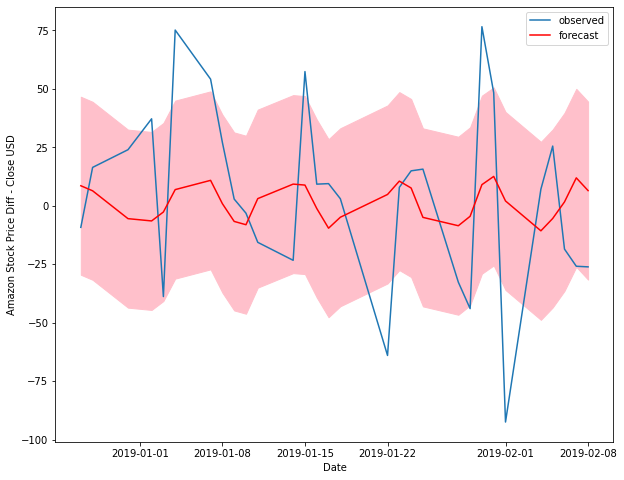

In [70]:
# plot the amazon data
plt.figure(figsize=(10, 8))

plt.plot(mean_forecast.index, amazon.diff().loc[mean_forecast.index[0]:], label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price Diff - Close USD')
plt.legend()
plt.show()

In [71]:
# Generate dynamic predictions
dynamic_forecast = results.get_prediction(start=-30, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate predictions
print(mean_forecast.head())

date
2018-12-27    8.539931
2018-12-28    6.655725
2018-12-31   -6.308801
2019-01-02   -6.489015
2019-01-03   -2.600324
Name: predicted_mean, dtype: float64


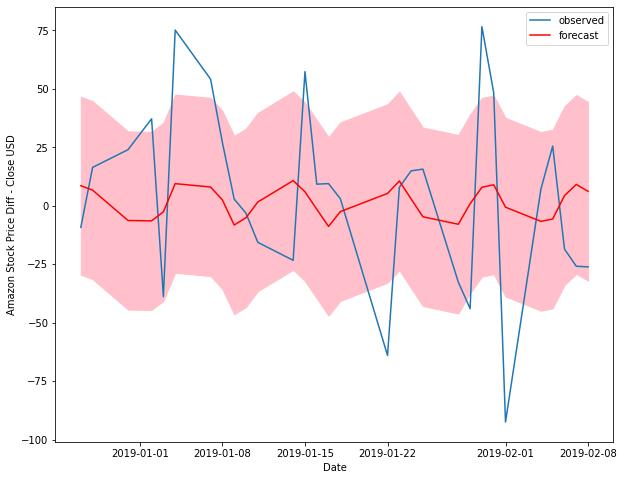

In [72]:
# plot the amazon data
plt.figure(figsize=(10, 8))

plt.plot(mean_forecast.index, amazon.diff().loc[mean_forecast.index[0]:], label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price Diff - Close USD')
plt.legend()
plt.show()

These 2 immediate past plots show that the order parameter is very important for developing accuracy of model prediction.

**How to Use the Middle parameter in the ARIMA Order Parameter**

In [73]:
# Take the first difference of the data
amazon_diff = amazon.diff().dropna()

# Create ARMA(2,2) model
arma = ARIMA(amazon_diff, order=(2,0,2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1258
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -5532.371
Date:                Wed, 19 Oct 2022   AIC                          11076.743
Time:                        10:40:07   BIC                          11107.566
Sample:                             0   HQIC                         11088.327
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9879      0.494      1.999      0.046       0.019       1.957
ar.L1         -0.1541      0.073     -2.119      0.034      -0.297      -0.012
ar.L2          0.7945      0.072     11.089      0.0

In [74]:
# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast)

# Make absolute value forecast
arma_value_forecast = arma_int_forecast + amazon.iloc[-1,0]

# Print forecast
print(arma_value_forecast)

1258    1592.064032
1259    1594.212481
1260    1597.290725
1261    1598.878622
1262    1601.434820
1263    1602.657794
1264    1604.855456
1265    1605.843741
1266    1607.792708
1267    1608.632851
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [75]:
# Create ARIMA(2,1,2) model
arima = ARIMA(amazon, order=(2,1,2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


1259    1593.400328
1260    1601.675767
1261    1605.435933
1262    1601.248350
1263    1592.991557
1264    1588.263017
1265    1591.388447
1266    1599.464795
1267    1605.056453
1268    1603.040846
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)




---


**ACF and PACF Functionality**

**Choosing Model Order Parameters**

---



If the ACF values are high and tail off very very slowly this is a sign that the data is non-stationarity, so it needs to be differenced.

If the autocorrelation at lag-1 is very negative this is a sign that we have taken the difference too many times.

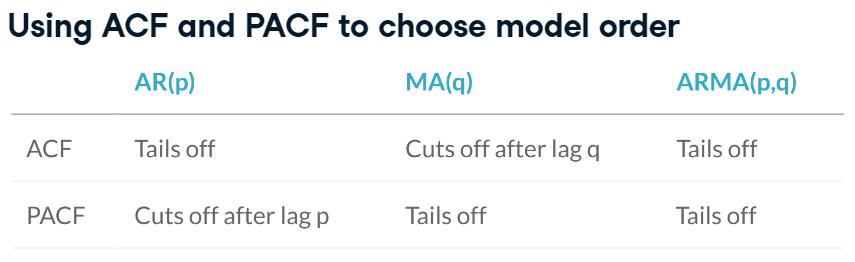

In [76]:
earthquake = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/earthquakes.csv', parse_dates=['date'], index_col='date')
earthquake.head()

,Year,earthquakes_per_year
date,,
1900-01-01,1900,13.0
1901-01-01,1901,14.0
1902-01-01,1902,8.0
1903-01-01,1903,10.0
1904-01-01,1904,16.0


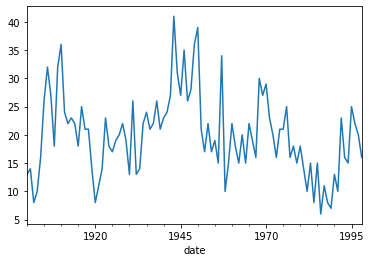

In [77]:
earthquake['earthquakes_per_year'].plot()
plt.show();

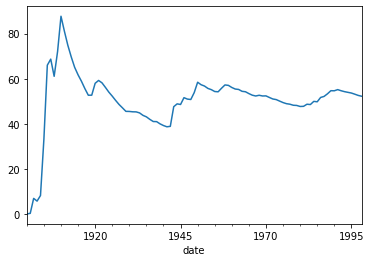

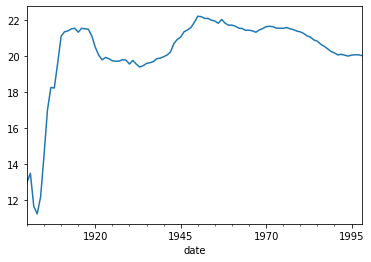

In [78]:
# Plot variance and mean to check stationarity
earthquake['earthquakes_per_year'].expanding(1).var(ddof=0).plot()
plt.show();

earthquake['earthquakes_per_year'].expanding(1).mean().plot()
plt.show();

Some stationarity is seen howbeit somewhat weak.

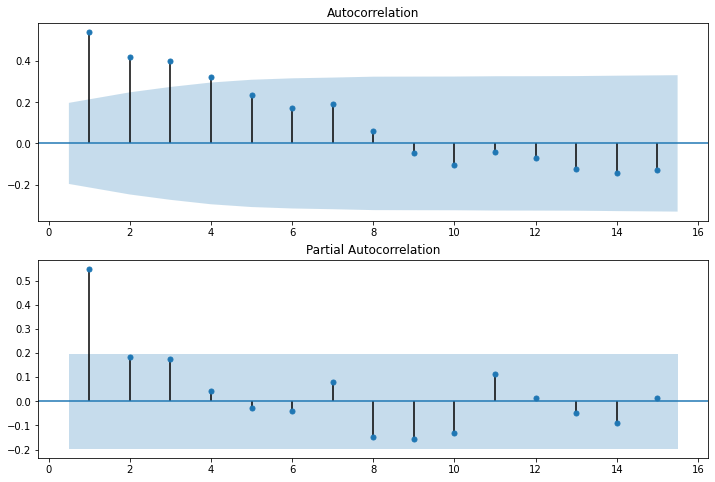

In [79]:
# Import libraries
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earthquake['earthquakes_per_year'], lags=15, zero=False, ax=ax1)
plot_pacf(earthquake['earthquakes_per_year'], lags=15, zero=False, ax=ax2)

# Show plot
plt.show()

In [80]:
# Create model for the earthquake per year
# Instantiate model
model = ARIMA(earthquake['earthquakes_per_year'], order=(1,0,0))

# Train model
results = model.fit()

print(results.summary())

                                SARIMAX Results                                 
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                   ARIMA(1, 0, 0)   Log Likelihood                -318.984
Date:                  Wed, 19 Oct 2022   AIC                            643.968
Time:                          10:40:10   BIC                            651.753
Sample:                      01-01-1900   HQIC                           647.118
                           - 01-01-1998                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.8906      1.420     14.004      0.000      17.107      22.674
ar.L1          0.5433      0.078      6.930      0.000       0.390       0.697
sigma2        36.6976      4.832    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


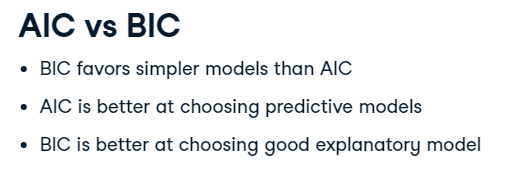

###### **Choose the Right Model for the Amazon Data**

In [ ]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-5
for p in range(6):
  # Loop over q values from 0-5
    for q in range(6):
      	# create and fit ARMA(p,q) model
        model = ARIMA(amazon, order=(p,0,q))
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p, q, results.aic, results.bic))


order_aic_bic

In [82]:
Calc_Order = pd.DataFrame(order_aic_bic, columns=['p','q','AIC','BIC'])
Calc_Order.head()

,p,q,AIC,BIC
0,0,0,19156.577962,19166.854108
1,0,1,17486.754692,17502.168911
2,0,2,16128.897544,16149.449836
3,0,3,15982.230468,16007.920833
4,0,4,15531.886622,15562.715061


In [83]:
Calc_Order.sort_values(by='AIC', ascending=True).head()

,p,q,AIC,BIC
32,5,2,11093.345816,11139.588474
27,4,3,11093.534645,11139.777302
20,3,2,11093.650154,11129.616666
26,4,2,11094.271902,11135.376486
29,4,5,11094.316346,11150.835149


In [84]:
Calc_Order.sort_values(by='BIC', ascending=True).head()

,p,q,AIC,BIC
6,1,0,11101.103319,11116.517538
7,1,1,11102.435247,11122.987539
12,2,0,11102.533847,11123.086139
13,2,1,11097.966904,11123.657270
8,1,2,11103.496666,11129.187031


**Choose the Right Model for the Earthquake Data**

In [ ]:
order_aic_bic_earthquake = []

# Loop over p values from 0-7
for p in range(7):
    # Loop over q values from 0-7
    for q in range(7):
      
        try:
            # create and fit ARMA(p,q) model
            model = ARIMA(earthquake['earthquakes_per_year'], order=(p,0,q))
            results = model.fit()
            
            # Print order and results
            order_aic_bic_earthquake.append((p, q, results.aic, results.bic))
            
        except:
            order_aic_bic_earthquake.append((p, q, None, None))  

In [108]:
Calc_earthquake_order = pd.DataFrame(order_aic_bic_earthquake, columns=['p','q','AIC','BIC'])
Calc_earthquake_order.sort_values(by='AIC', ascending=True).head()

,p,q,AIC,BIC
17,2,3,637.816060,655.981899
18,2,4,639.774504,660.535463
8,1,1,640.456284,650.836763
25,3,4,640.568339,663.924418
21,3,0,641.496668,654.472268




---


**Evaluating Model's Goodness-of-Fit**

---



Residuals = real value - one-step-predicted-value

Ideal model should have residuals which are white noise centered on zero i.e. mean value is zero.

Mean Absolute Error can be used to determine the error.

4 plots gotten from the function '.plot_diagnostics()' can be used to evaluate the model performance.

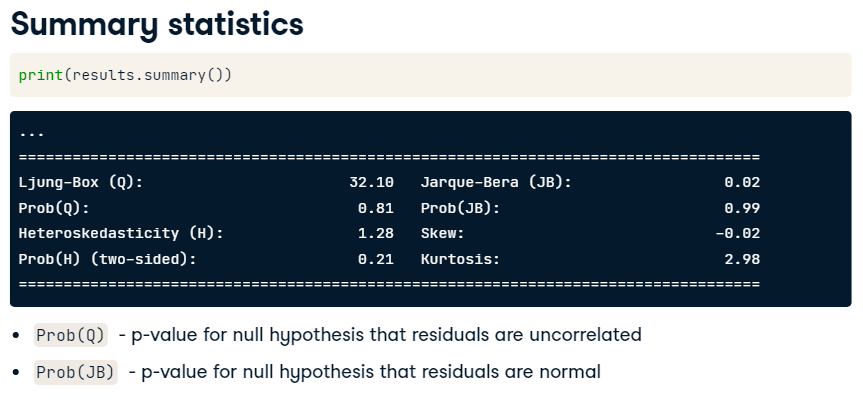

In [117]:
# Fit model
model = ARIMA(earthquake['earthquakes_per_year'], order=(1,0,1))
results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print(mae)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


4.56898829488138


In [118]:
print(results.summary())

                                SARIMAX Results                                 
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                   ARIMA(1, 0, 1)   Log Likelihood                -316.228
Date:                  Wed, 19 Oct 2022   AIC                            640.456
Time:                          11:00:18   BIC                            650.837
Sample:                      01-01-1900   HQIC                           644.656
                           - 01-01-1998                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6684      2.137      9.202      0.000      15.479      23.858
ar.L1          0.8306      0.084      9.881      0.000       0.666       0.995
ma.L1         -0.4369      0.140    

The null hypothesis is accepted for the uncorrelation of residuals, and the normal distribution of the residuals.

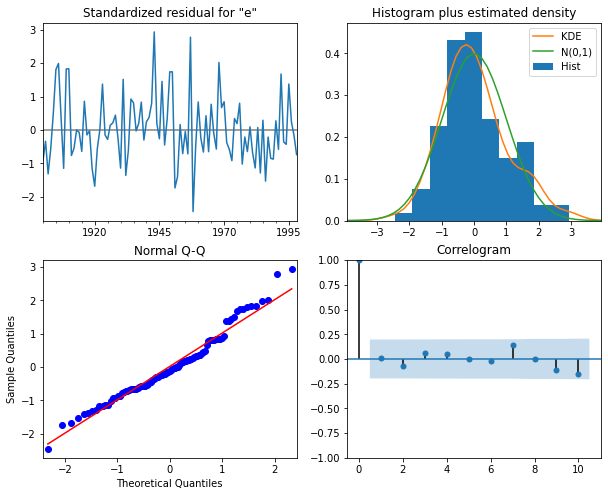

In [119]:
# Plot Residuals Diagonistics.
results.plot_diagnostics(figsize=(10,8))
plt.show();

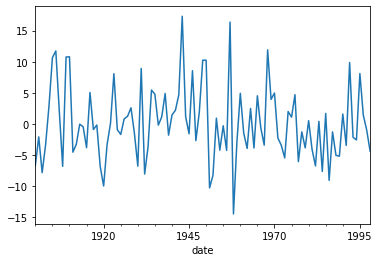

In [120]:
residuals= results.resid
residuals.plot()
plt.show();

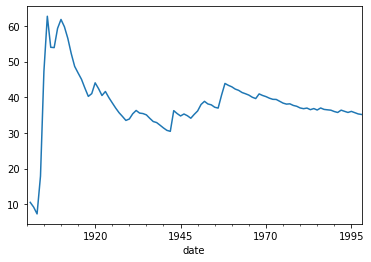

In [121]:
residuals.expanding(1).var(ddof=1).plot()
plt.show();

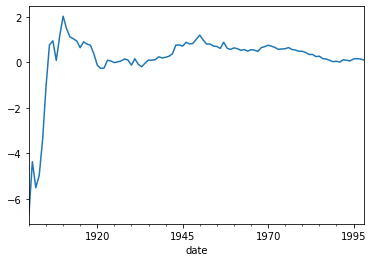

In [122]:
residuals.expanding(1).mean().plot()
plt.show();